In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
import sklearn
from random import random
from sklearn.model_selection import cross_validate
import matplotlib
from waveform_methods import binning
import pandas as pd

from scipy.stats import norm
import pickle
from statistics import mode
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import scale
from scipy.optimize import curve_fit

In [2]:
file = uproot.open('/home/andy/12360.root')
file2 = uproot.open('/home/andy/12362.root')

In [3]:
print(file.keys())

[b'CalibratedHLCWaveforms;249', b'CalibratedHLCWaveforms;248', b'LaputopHLCWaveforms;175', b'LaputopHLCWaveforms;174', b'IceTopHLCPulseInfo;6', b'IceTopHLCPulseInfo;5', b'IceTopHLCVEMPulses;6', b'IceTopHLCVEMPulses;5', b'IceTopHLCPEPulses;6', b'IceTopHLCPEPulses;5', b'All_pulses;4', b'All_pulses;3', b'All_10;3', b'All_10;2', b'All_50;3', b'All_50;2', b'All_90;3', b'All_90;2', b'Millipede;3', b'Millipede;2', b'LaputopHLCPE;3', b'LaputopHLCPE;2', b'CalibratedSLCWaveforms;2', b'CalibratedSLCWaveforms;1', b'All_radius_old;2', b'All_radius_old;1', b'All_radius;2', b'All_radius;1', b'IceTopSLCVEMPulses;2', b'IceTopSLCVEMPulses;1', b'IceTopSLCPEPulses;2', b'IceTopSLCPEPulses;1', b'Millipede_dEdX;2', b'Millipede_dEdX;1', b'LaputopSLCPE;2', b'LaputopSLCPE;1', b'MCPrimaryInfo;2', b'MCPrimaryInfo;1', b'CurvatureOnly;1', b'CurvatureOnlyParams;1', b'I3EventHeader;1', b'IT73AnalysisInIceQualityCuts;1', b'Laputop;1', b'LaputopParams;1', b'MCPrimary;1', b'ShowerCOG;1', b'MillipedeFitParams;1', b'Stoch

In [4]:
radius1 = file['All_radius']['item'].array()
radius2 = file2['All_radius']['item'].array()

In [5]:
print(file['LaputopHLCWaveforms'].keys())

[b'Count_LaputopHLCWaveforms', b'Run', b'Event', b'SubEvent', b'SubEventStream', b'SubEventStream_String', b'exists', b'string', b'om', b'ok', b't0', b'dt', b'nbins', b'wf']


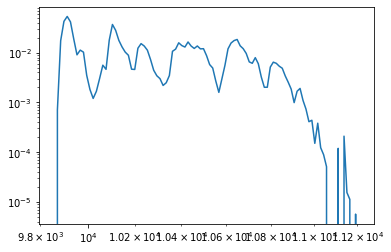

In [65]:
waveforms = file['LaputopHLCWaveforms']['wf'].array()
t0 = file['LaputopHLCWaveforms']['t0'].array()
dt = file['LaputopHLCWaveforms']['dt'].array()
count = 0
time = []
wf = []
event = 10000
for j in range(len(waveforms[event])):
    if radius1[event][j] < 300:
        time +=[t0[event][j]+i*dt[event][j] for i in range(len(waveforms[event][j]))]
        wf += list(waveforms[event][j]/np.sum(waveforms[event][j]))

mean,std,bins = binning(time,wf,bins=100)
plt.loglog(bins,mean)
plt.savefig('example_waveform')